In [17]:
import random
import networkx as nx
import heapq
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from random_graph import RandomGraphBuilder
from IPython.display import Image

In [18]:
def prims_animated(graph):
    """
    Implementation of Prim's algorithm for finding the minimum spanning tree of a graph
    :param graph: The input networkx Graph or DiGraph object
    :return: The minimum spanning tree of the input graph
    """
    # Set up list of animation frames to record the steps
    animation_steps = []  # Store (node, edge) states for each step

    start = list(graph.nodes)[random.randint(0, len(graph.nodes) - 1)]  # Randomly select a starting node from the graph
    mst = type(graph)()  # Create a new graph of the same type as the input graph
    mst.add_node(start)  # Initialize the MST with the start node

    p_queue = []  # Initialize the priority queue
    for origin, link, data in graph.edges(start, data=True):  # Add all edges from the start node to the priority queue
        weight = data['weight']
        edge_tuple = (origin, link)
        # heapq orders items based on the zeroth element so we ensure the weight is the zeroth element in the tuple
        heapq.heappush(p_queue, (weight, edge_tuple))

    # Initialize the first animation frame
    animation_steps.append((set(mst.nodes), set(), list(p_queue)))

    while mst.nodes != graph.nodes:
        weight, edge = heapq.heappop(p_queue)

        if edge[1] not in mst.nodes:
            mst.add_node(edge[1])
            mst.add_edge(*edge, weight=weight)

            for origin, link, data in graph.edges(edge[1], data=True):
                if link not in mst.nodes:
                    weight = data['weight']
                    edge_tuple = (origin, link)
                    heapq.heappush(p_queue, (weight, edge_tuple))


            # Append the current MST nodes, MST edges, and queue for animation
            animation_steps.append((set(mst.nodes), set(mst.edges), list(p_queue)))
    
    return mst, animation_steps

In [19]:
def update_anim(frame, graph, pos, ax):
    ax.clear()

    # Draw the full graph in grey with edge weights
    nx.draw(graph, pos, ax=ax, node_color='lightgrey', edge_color='lightgrey', with_labels=True)
    edge_labels = nx.get_edge_attributes(graph, 'weight')
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels, ax=ax, font_color='grey')

    # Extract current state from frame
    nodes, edges, p_queue = frame
    # Create a set of nodes in the original graph that are not in the MST
    non_mst_nodes = set(graph.nodes) - nodes

    # Highlight nodes that are in the MST in black with white labels
    nx.draw_networkx_nodes(graph, pos, nodelist=nodes, ax=ax, node_color='black')
    nx.draw_networkx_labels(graph, pos, labels={node: node for node in nodes}, ax=ax, font_color='white')

    # Highlight edges and weights that are in MST in black
    nx.draw_networkx_edges(graph, pos, edgelist=edges, ax=ax, edge_color='black')
    mst_edge_labels = {edge: graph.edges[edge]['weight'] for edge in edges}
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=mst_edge_labels, ax=ax, font_color='black')

    # Highlight edges and weights in priority queue in red as long as they are connected to a node not in the MST
    queue_edges = [edge for _, edge in p_queue if edge not in edges and (edge[0] in non_mst_nodes or edge[1] in non_mst_nodes)]
    nx.draw_networkx_edges(graph, pos, edgelist=queue_edges, ax=ax, edge_color='red', style='dashed')
    queue_edge_labels = {edge: graph.edges[edge]['weight'] for edge in queue_edges}
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=queue_edge_labels, ax=ax, font_color='red')

Starting with a Graph with 5 nodes and 6 edges
This should give us a min. spanning tree with 5 nodes and 4 edges
And our minimum spanning tree is a Graph with 5 nodes and 4 edges


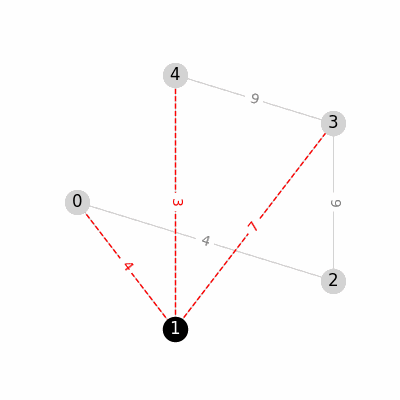

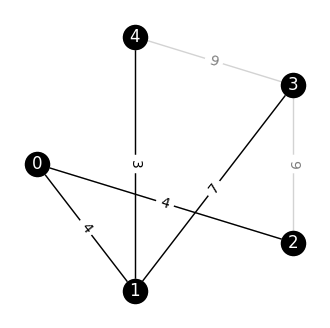

In [ ]:
num_nodes = random.randint(3, 10)
max_edges = (num_nodes * (num_nodes - 1)) / 2
exp_edges = random.randint(num_nodes - 1, max_edges)
edge_density = exp_edges / max_edges

G = RandomGraphBuilder() \
    .nodes(num_nodes) \
    .random_edges(edge_density) \
    .weighted(range(1,10)) \
    .build()

print(f"Starting with a {G}")
print(f"This should give us a min. spanning tree with {len(G.nodes)} nodes and {len(G.nodes) - 1} edges")

# Run Prim's algorithm with animation step tracking
mst, animation_steps = prims_animated(G)
print(f"And our minimum spanning tree is a {mst}")

# Set up the plot
fig, ax = plt.subplots(figsize=(4, 4))
pos = nx.shell_layout(G)  # Use shell_layout to avoid nodes on top of edges

# Finally, create the animation
FuncAnimation(fig, update_anim, frames=animation_steps, fargs=(G, pos, ax), interval=1000, repeat=False).save("prims_animation.gif", writer='pillow', fps=0.5)

# And display the animation in a way that jupyter supports
Image(filename="prims_animation.gif")